In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
from scipy import optimize
#from scipy.optimize import least_squares
import numpy as np
#from numpy.random import normal
plot_scale= 6

In [2]:
def plot(data,plotname,fit = False):
    bold = '\033[1m'
    end = '\033[0m'
    fig, ax =plt.subplots(2,3,figsize = (2*plot_scale,1*plot_scale), layout="constrained")
    title = "Overall Data Plotted from file " + plotname
    fig.suptitle(title, weight= 'bold',fontsize = 2*plot_scale)
    fig.add_gridspec #double check
    fig.supylabel("Amplitude", weight = 'bold',fontsize =1.5*plot_scale)
    fig.supxlabel("Count Number (time)", weight = 'bold',fontsize = 1.5*plot_scale)

    ax[0,0].set_title("A")
    ax[0,0].scatter(data.Counts,data.A)

    ax[0,1].set_title("B")
    ax[0,1].scatter(data.Counts,data.B)

    ax[0,2].set_title("C")
    ax[0,2].scatter(data.Counts,data.C)

    ax[1,0].set_title("AB")
    ax[1,0].scatter(data.Counts,data.AB)

    ax[1,1].set_title("AC")
    ax[1,1].scatter(data.Counts,data.AB)

    ax[1,2].set_title("AB and AC")
    ax[1,2].scatter(data.Counts,data.AB)
    ax[1,2].scatter(data.Counts,data.AC)
    
    def square_wave_func(x,f, a, h,phi):
        return h+a*np.sin(np.cos(2* np.pi *f*x +phi))
    def params():
        params, params_convarince =optimize.curve_fit(square_wave_func,x,y)
        return params, params_convarince

    if fit :
        ax[0,0].plot(data.Counts,square_wave_func(data.A,))
        
    path = 'plots/'
    try:
        path =os.path.join(path, plotname)
        fig.savefig(path)
    except OSError as error:
        if os.path.exists(path):
            os.remove(path)
            path =os.path.join(path, plotname)
    plt.close()
    return fig

In [3]:
files = []
for f in glob.glob("Data/*.txt"):
    file = pd.read_csv(f,delimiter="\t")
    file = file.loc[~(file ==0).all(axis=1)]
    file = file.iloc[:,0:6]
    file.columns =['Counts','A','B','AB','C','AC']
    name = f.split('.txt')[0].split('\\')[1]
    plot(file,name)
    

In [4]:
file = pd.read_csv("Data/DJ-run-3-5-24.txt",delimiter="\t")
file = file.loc[~(file ==0).all(axis=1)]
file = file.iloc[:,0:6]
file.columns =['Counts','A','B','AB','C','AC']
name = f.split('.txt')[0].split('\\')[1]


c:\Users\Emily Herbert\anaconda3\envs\optics_env_2024\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Emily Herbert\anaconda3\envs\optics_env_2024\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


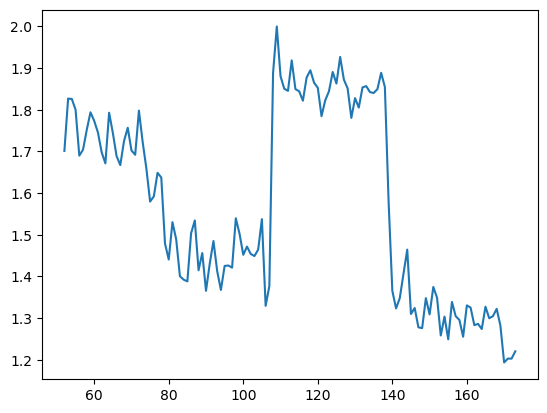

In [5]:
from scipy.fft import fft, fftfreq
from sklearn import preprocessing

data = np.array(file.AB).reshape(-1,1)
yf = fft(data)
plt.plot(file.Counts, yf/(np.max(data)/2))
#plt.plot(file.Counts,file.AB)
plt.show()

